In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
tf.__version__

'1.15.0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


그림속 숫자 :  3


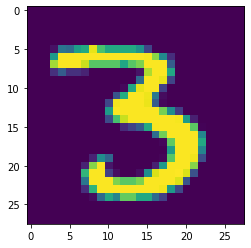

In [5]:
from matplotlib import pyplot as plt
plt.imshow(train_images[12])
print("그림속 숫자 : ",train_labels[12])

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=512)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5079 - acc: 0.8515
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1076 - acc: 0.9671
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0716 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0555 - acc: 0.9824
Epoch 5/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0456 - acc: 0.9862


In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/10000 - 0s - loss: 0.0354 - acc: 0.9885
0.9885
